In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(color_codes=True)

subida = pd.read_csv("subida.tsv", sep="\t", decimal=",").fillna(0)
bajada = pd.read_csv("bajada.tsv", sep="\t", decimal=",").fillna(0)

subida["Movimiento"] = ["subida" for i in range(0, len(subida))]
bajada["Movimiento"] = ["bajada" for i in range(0, len(bajada))]

subida["Aceleración (m/s²)"] = subida["Velocidad (m/s)"].diff()
bajada["Aceleración (m/s²)"] = bajada["Velocidad (m/s)"].diff()


datos = pd.concat([subida, bajada])


<AxesSubplot:xlabel='Tiempo (s)', ylabel='Fuerza (N)'>

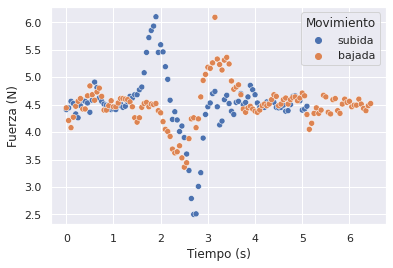

In [92]:
sns.scatterplot(x="Tiempo (s)", y="Fuerza (N)", data=datos, hue="Movimiento")

# p = sns.scatterplot(x="Tiempo (s)", y="Fuerza (N)", data=subida).set_title("Subida")

# d =sns.scatterplot(x="Tiempo (s)", y="Fuerza (N)", data=bajada).set_title("Bajada")

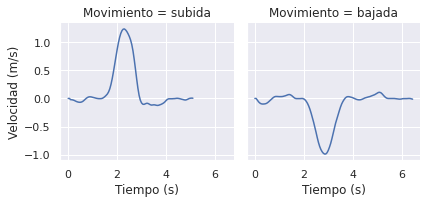

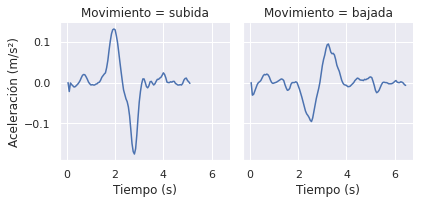

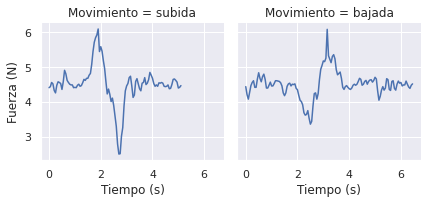

In [94]:
v = sns.FacetGrid(datos, col="Movimiento")
v.map(sns.lineplot, "Tiempo (s)", "Velocidad (m/s)", ci="sd")
v.add_legend()

a = sns.FacetGrid(datos, col="Movimiento")
a.map(sns.lineplot, "Tiempo (s)", "Aceleración (m/s²)", ci="sd")
a.add_legend()

f = sns.FacetGrid(datos, col="Movimiento")
f.map(sns.lineplot, "Tiempo (s)", "Fuerza (N)", ci="sd")
f.add_legend()
# sns.relplot(x="Tiempo (s)", y="Velocidad (m/s)", data=datos, kind="line", hue="Movimiento")
# sns.relplot(x="Tiempo (s)", y="Aceleración (m/s²)", data=datos, kind="line", hue="Movimiento")


# sns.relplot(x="Tiempo (s)", y="Fuerza (N)", data=subida, kind="line")
# sns.relplot(x="Tiempo (s)", y="Fuerza (N)", data=bajada, kind="line")